In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv(r"C:\Users\jiten\OneDrive\Desktop\Project\Python\Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [59]:
#Replacing TotalCharges with 0 for blank rows as tenure is also 0 for the same
df['TotalCharges'] = df['TotalCharges'].replace(' ','0')
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [61]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [63]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [65]:
df.duplicated().sum()

0

In [67]:
# converted 0 and 1 values of senior citizen to yes/no to make it easier to understand
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

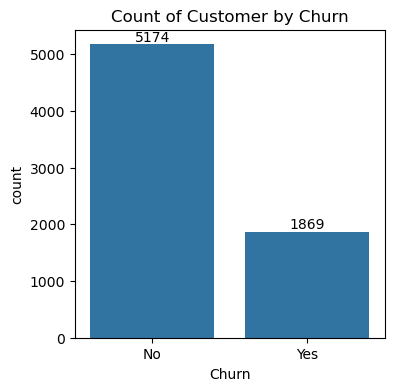

In [83]:
plt.figure(figsize = (4,4))
b1 = sns.countplot(x='Churn', data=df)
b1.bar_label(b1.containers[0])
plt.title('Count of Customer by Churn')
plt.show()

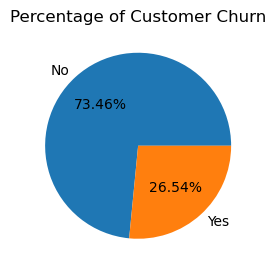

In [95]:
plt.figure(figsize=(3,4))
p1 = df.groupby('Churn').agg({'Churn':'count'})
plt.pie(p1['Churn'], labels = p1.index, autopct= '%1.2f%%')
plt.title('Percentage of Customer Churn')
plt.show()

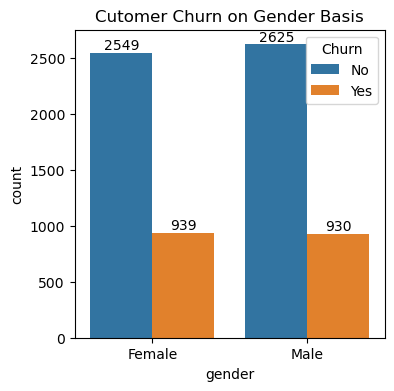

In [111]:
plt.figure(figsize = (4,4))
b2 = sns.countplot(x= 'gender', data=df, hue='Churn')
b2.bar_label(b2.containers[0])
b2.bar_label(b2.containers[1])
plt.title("Cutomer Churn on Gender Basis")
plt.show()

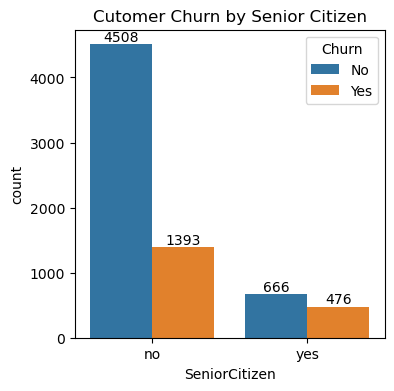

In [113]:
plt.figure(figsize = (4,4))
b2 = sns.countplot(x= 'SeniorCitizen', data=df, hue='Churn')
b2.bar_label(b2.containers[0])
b2.bar_label(b2.containers[1])
plt.title("Cutomer Churn by Senior Citizen")
plt.show()

In [115]:
#comparative a greater pecentage of people in senior citizen category have churned

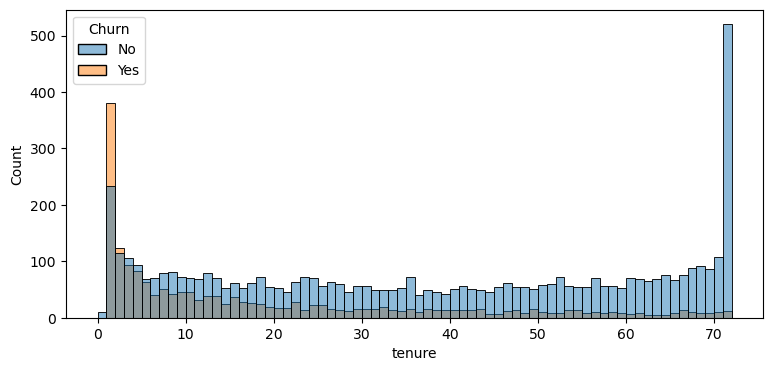

In [121]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

In [123]:
#Customers with less than 3 months of tenure are most likely to Churn

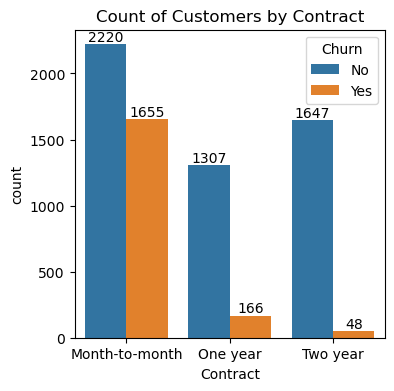

In [125]:
plt.figure(figsize = (4,4))
b3 = sns.countplot(x = "Contract", data = df, hue = "Churn")
b3.bar_label(b3.containers[0])
b3.bar_label(b3.containers[1])
plt.title("Count of Customers by Contract")
plt.show()

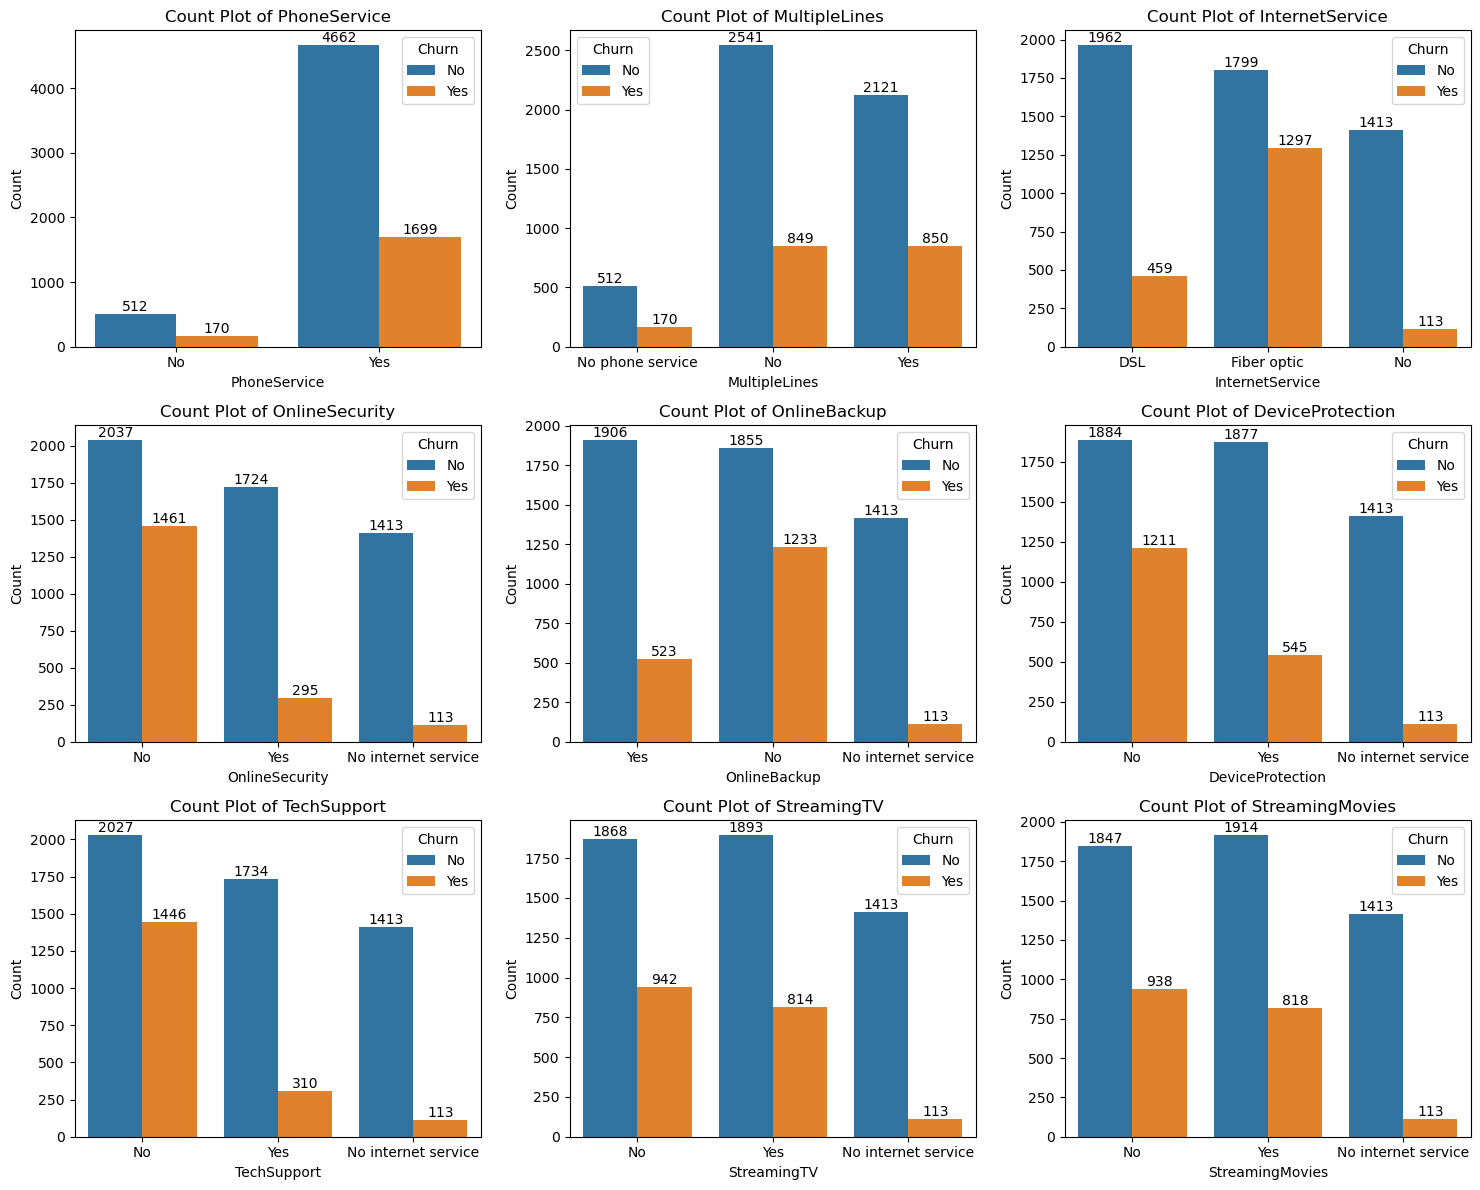

In [139]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
# Create subplots
fig, axes = plt.subplots(3,3, figsize=(15, 12))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    b =sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

    for container in b.containers:
        b.bar_label(container)


plt.tight_layout()
plt.show()

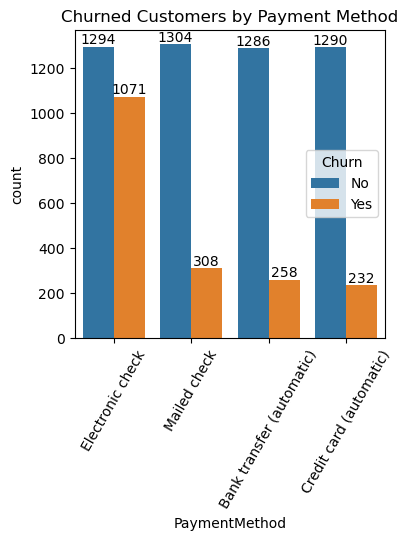

In [159]:
plt.figure(figsize = (4,4))
b3 = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
b3.bar_label(b3.containers[0])
b3.bar_label(b3.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 60)
plt.show()